<Axes: title={'center': 'weather'}, xlabel='type'>

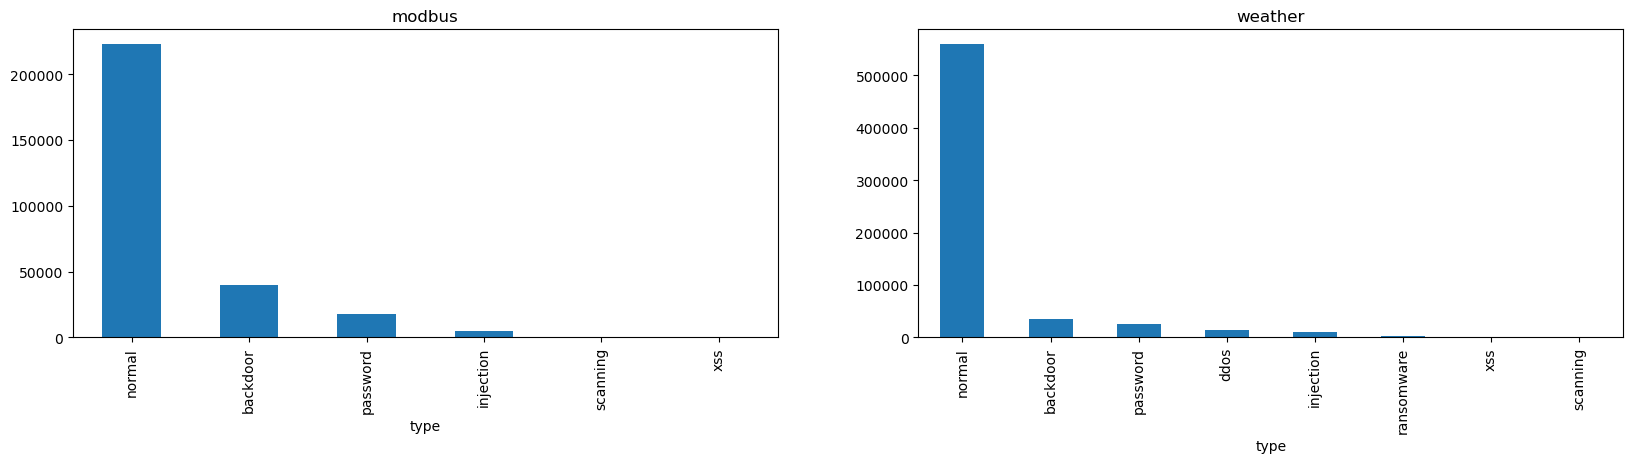

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

modbus_data = pd.read_csv('./data/IoT_Modbus.csv')
weather_data = pd.read_csv('./data/IoT_Weather.csv')

fig, axes = plt.subplots(ncols=2, figsize=(20, 4))

modbus_data.type.value_counts().plot.bar(ax=axes[0], title='modbus')
weather_data.type.value_counts().plot.bar(ax=axes[1], title='weather')

In [23]:
pd.isna(modbus_data).any(), pd.isna(weather_data).any()

(date                         False
 time                         False
 FC1_Read_Input_Register      False
 FC2_Read_Discrete_Value      False
 FC3_Read_Holding_Register    False
 FC4_Read_Coil                False
 label                        False
 type                         False
 dtype: bool,
 date           False
 time           False
 temperature    False
 pressure       False
 humidity       False
 label          False
 type           False
 dtype: bool)

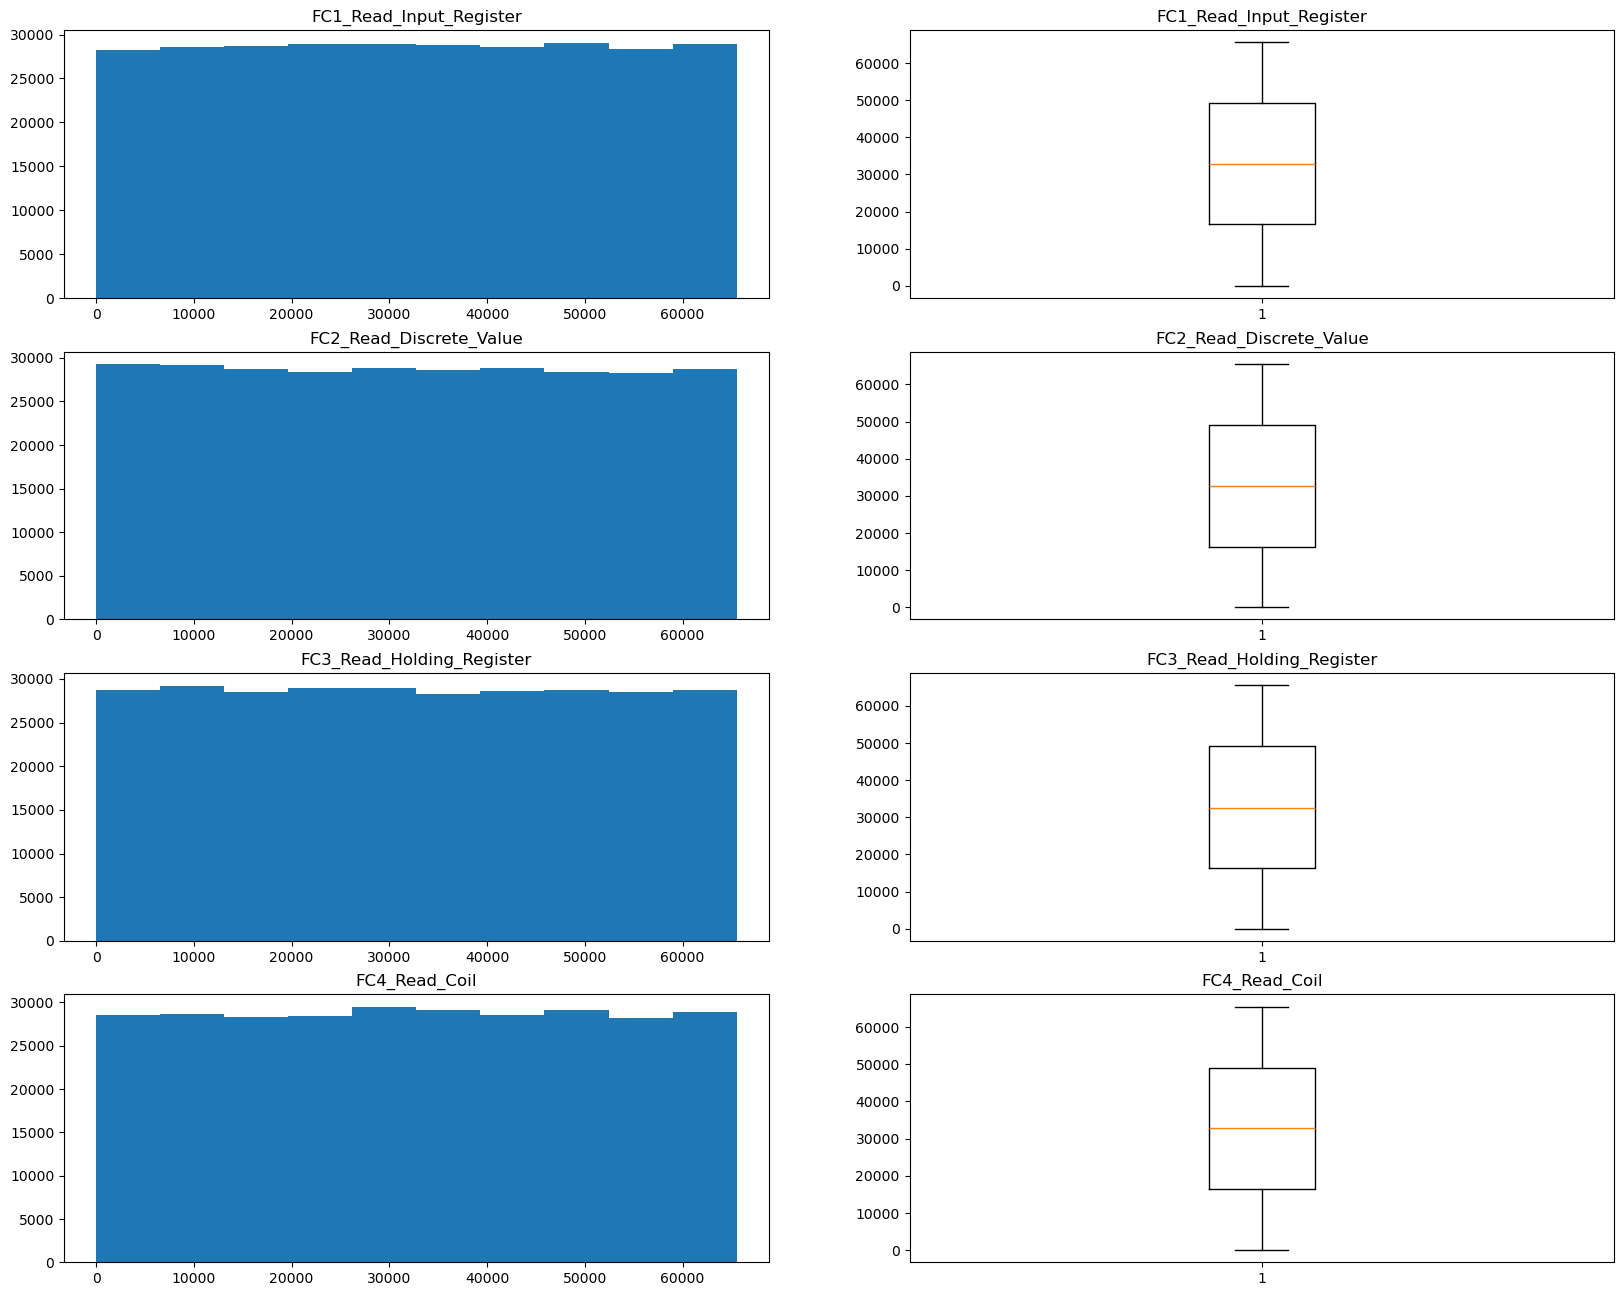

In [31]:
modbus_features = ['FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil']

fig, axes = plt.subplots(ncols=2, nrows=len(modbus_features), figsize=(20, len(modbus_features)*4))

for i, feature in enumerate(modbus_features):
    axes[i, 0].hist(modbus_data[feature])
    axes[i, 1].boxplot(modbus_data[feature])

    axes[i, 0].set_title(feature)
    axes[i, 1].set_title(feature)

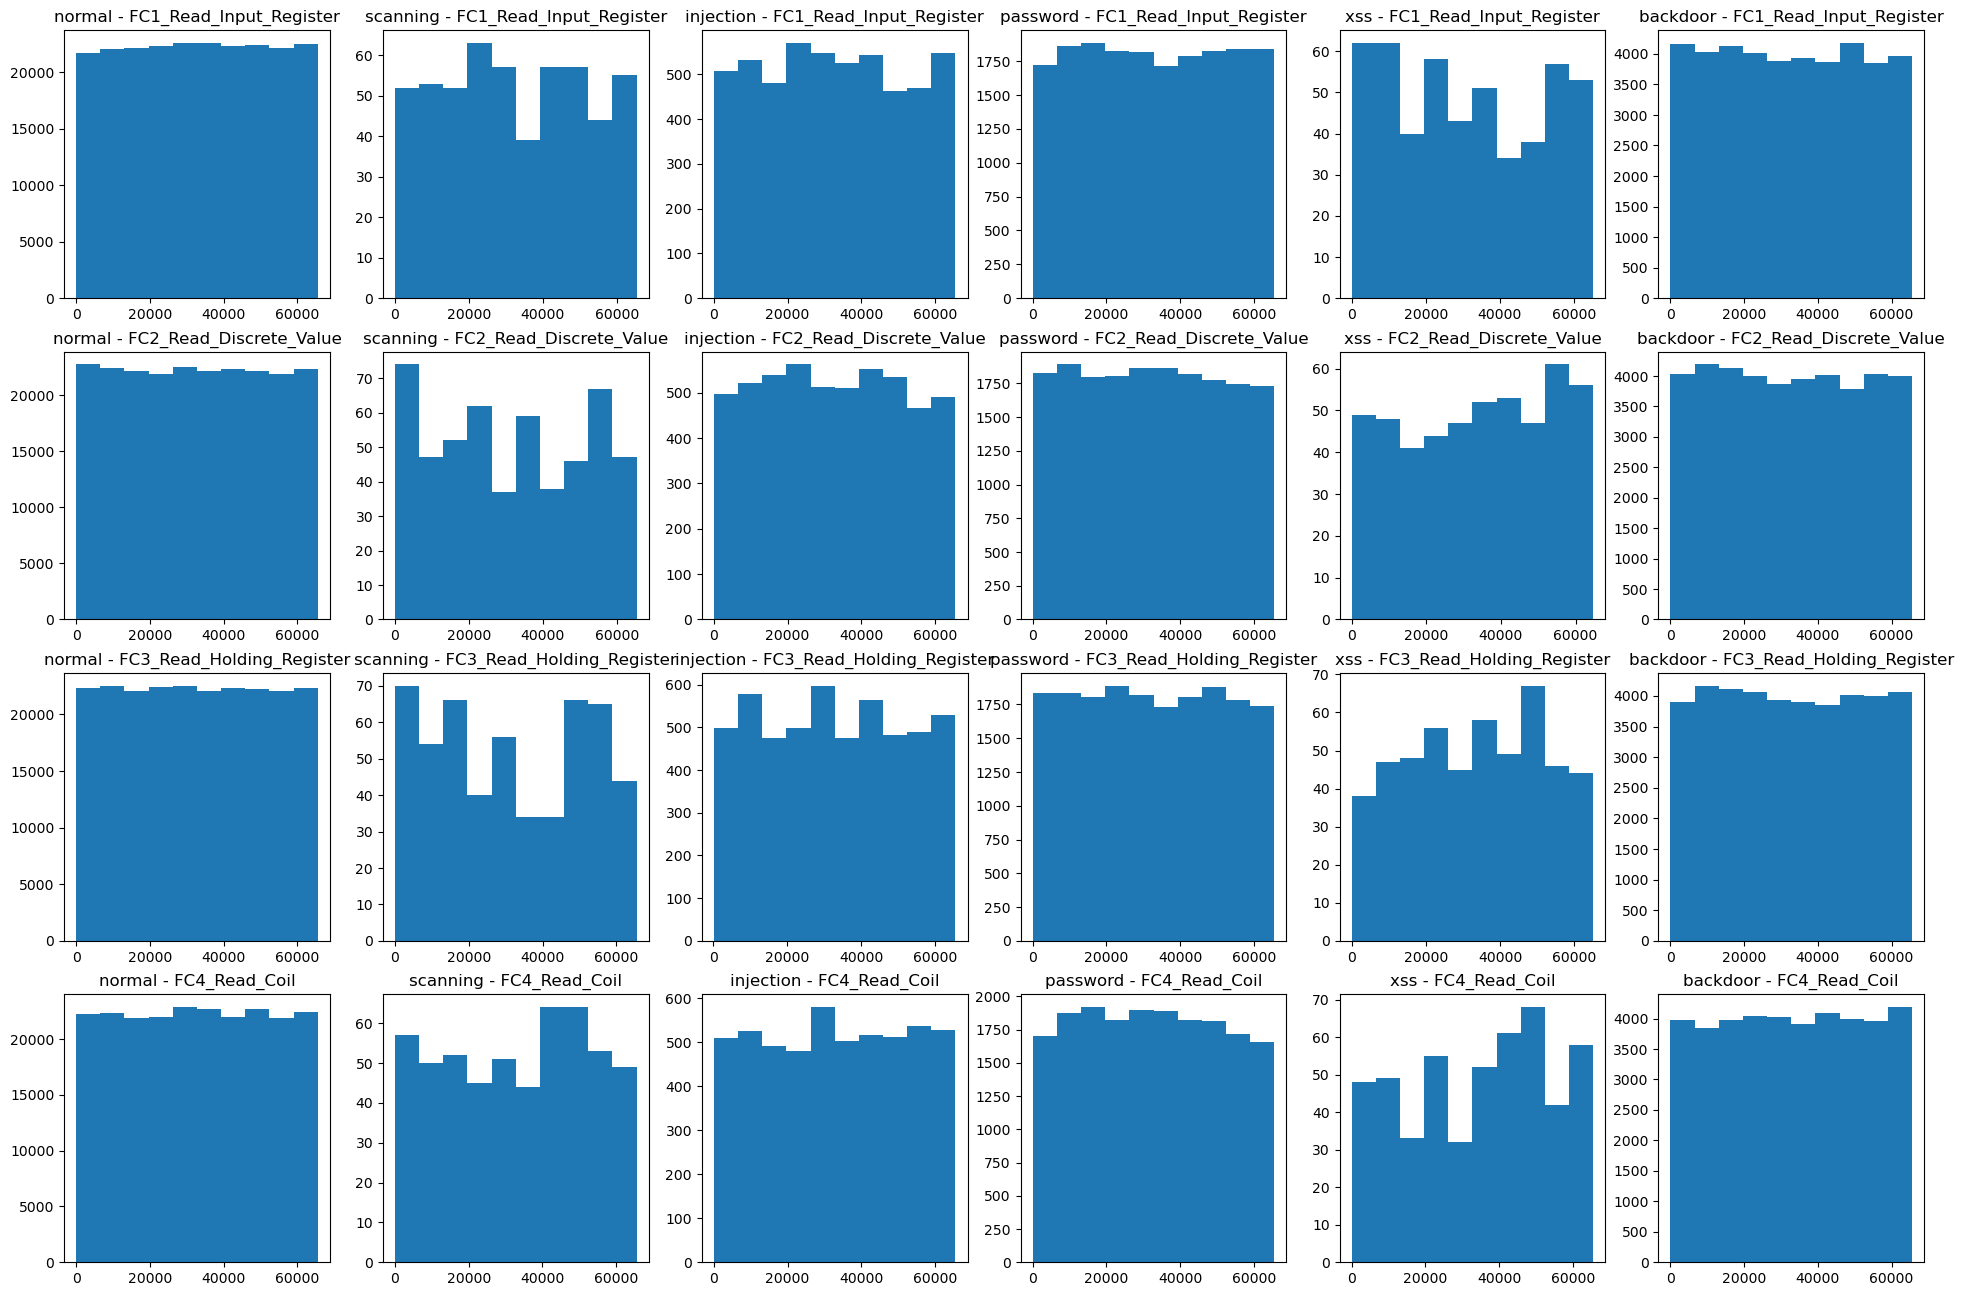

In [39]:
modbus_classes = modbus_data.type.unique()

fig, axes = plt.subplots(ncols=len(modbus_classes), nrows=len(modbus_features), 
                         figsize=(len(modbus_classes)*4, len(modbus_features)*4))

for i, cls in enumerate(modbus_classes):
    for j, feature in enumerate(modbus_features):
        axes[j, i].hist(modbus_data.loc[modbus_data.type == cls, feature])
        axes[j, i].set_title(f'{cls} - {feature}')

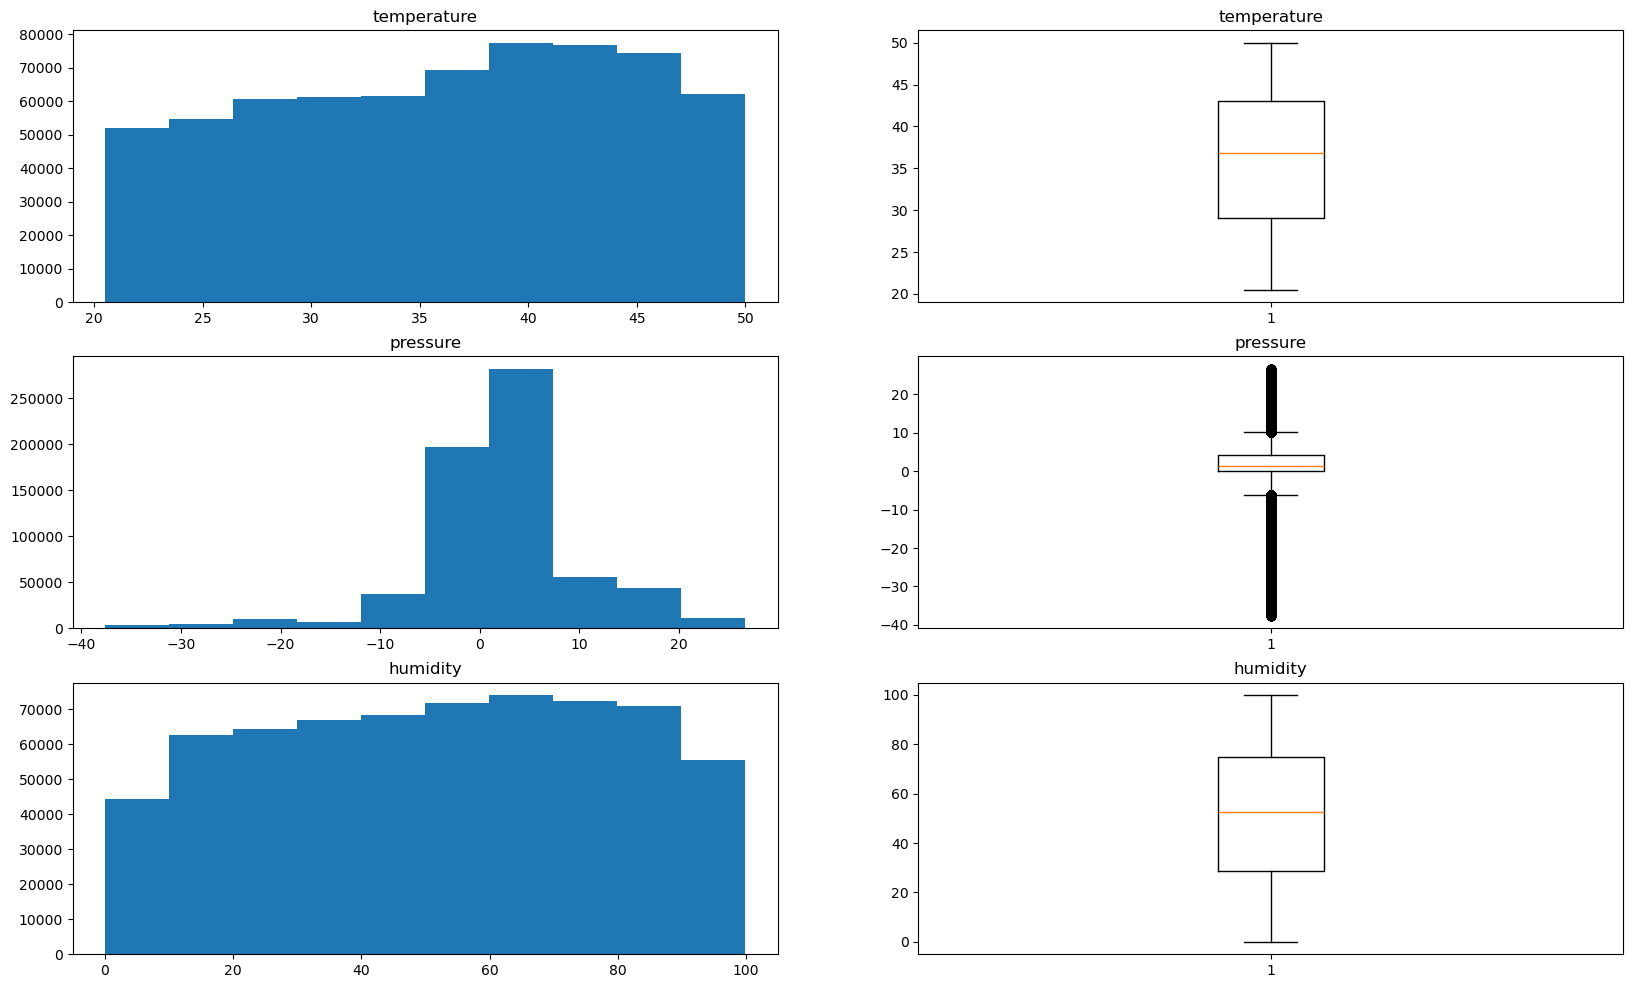

In [37]:
weather_features = ['temperature', 'pressure', 'humidity']

fig, axes = plt.subplots(ncols=2, nrows=len(weather_features), figsize=(20, len(weather_features)*4))

for i, feature in enumerate(weather_features):
    axes[i, 0].hist(weather_data[feature])
    axes[i, 1].boxplot(weather_data[feature])

    axes[i, 0].set_title(feature)
    axes[i, 1].set_title(feature)

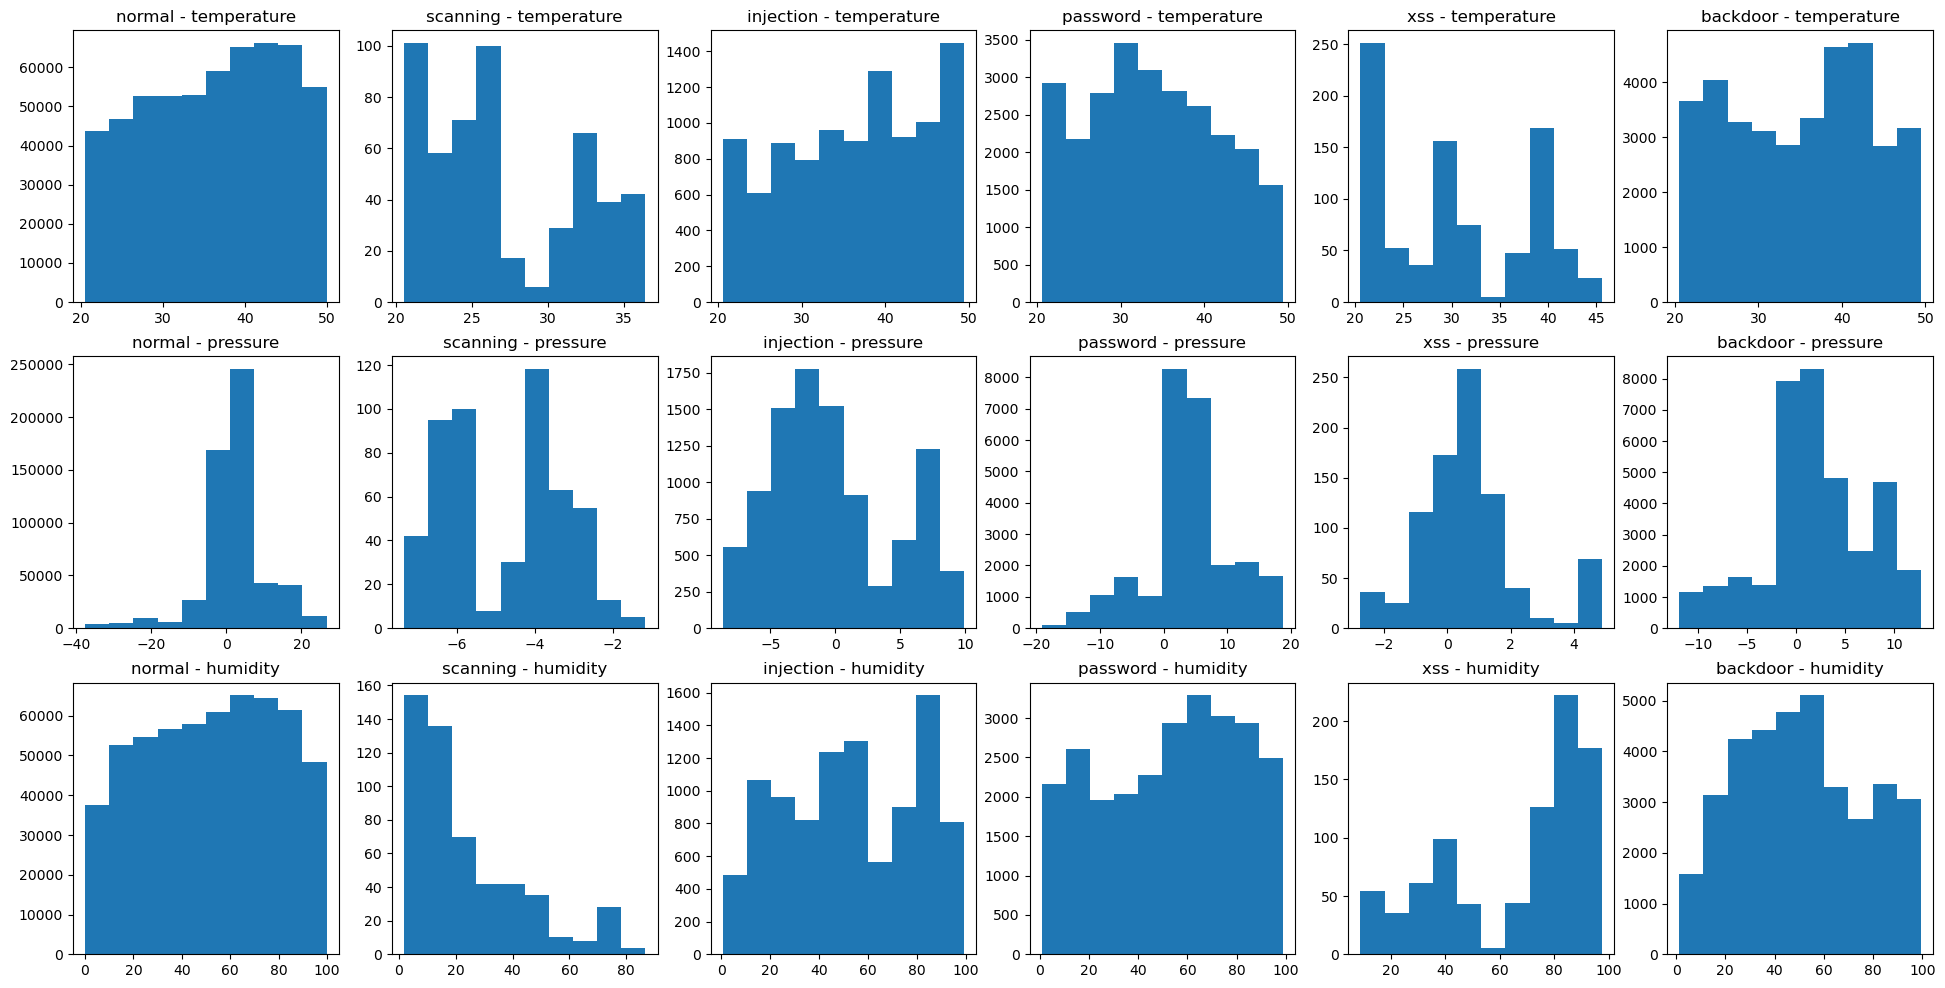

In [40]:
weather_classes = modbus_data.type.unique()

fig, axes = plt.subplots(ncols=len(weather_classes), nrows=len(weather_features), 
                         figsize=(len(weather_classes)*4, len(weather_features)*4))

for i, cls in enumerate(weather_classes):
    for j, feature in enumerate(weather_features):
        axes[j, i].hist(weather_data.loc[weather_data.type == cls, feature])
        axes[j, i].set_title(f'{cls} - {feature}')

Looks like classes might be distinguished by the distribution of features. No other good EDA ideas yet. Start preparing the data